# Exploring Boulder jail bookings data

We have downloaded 16 years of jail rolls from the Boulder County Sheriff's [website](https://www.bouldercounty.org/safety/jail/listing-and-booking-reports/). We joined them in the "Boulder Jail Bookings Data Join" notebook. In this notebook we will take a look at basic summaries of the data.

In [90]:
import pandas as pd

df = pd.read_csv('../data/all-bookings.csv')

In [91]:
df.head(3)

,Name,Booking No,Booked,Location,DOB,Race,Sex,Case No,Arresting Agency,Charge,Arrest Date
0,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,18-18-405(2)(A)(I). SALE/MFG/DIST/CONT S,2011-08-09
1,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,18-6-401(7)(B)(I) CHILD ABUSE,2011-08-09
2,"ARELLANO-ORDAZ,SIMON",1106625,2011-08-09 22:20:00,BJ INW,1988-04-10,W,M,110010043,BOULDER PD,42-2-101(1) DRIVING WITHOUT A VA,2011-08-09


In [92]:
print('''The combined data frame has {} rows.

There are:
{} unique bookings
{} unique case numbers
{} unique arrest dates.
{} unique name + birthdays
{} locations
{} arresting agencies'''.format(
    df.shape[0],
        df['Booking No'].nunique(),
        df['Case No'].nunique(),
        df['Arrest Date'].nunique(),
        (df['Name'] + df['DOB'].apply(str)).nunique(),
        df['Location'].nunique(),
        df['Arresting Agency'].nunique()
))

The combined data frame has 434423 rows.

There are:
167633 unique bookings
147976 unique case numbers
7655 unique arrest dates.
95495 unique name + birthdays
70 locations
17 arresting agencies


### Arrests by date

In [93]:
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])

In [94]:
df['arrest_year'] = df['Arrest Date'].apply(lambda x: x.year)

In [95]:
arrests_by_year = df.groupby('arrest_year').arrest_year.count()

print('''Arrests by year:

{}
'''.format(arrests_by_year[arrests_by_year > 1999]))

Arrests by year:

arrest_year
2000    25726
2001    26817
2002    29629
2003    24683
2004    24464
2005    25452
2006    24780
2007    23828
2008    24034
2009    22741
2010    22832
2011    22858
2012    24102
2013    24179
2014    24364
2015    24347
2016    26127
2017    12801
Name: arrest_year, dtype: int64



Looks like there are some weird arrests that occurred way before 2000. We filter them out for now.

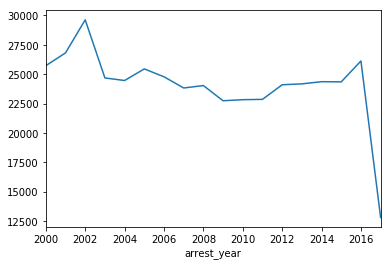

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

arrests_by_year[arrests_by_year > 1999].plot()

In [97]:
df['arrest_day_of_week'] = df['Arrest Date'].apply(lambda x: x.weekday())

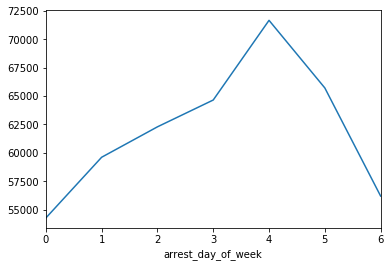

In [98]:
# Where 0 is Monday, and 6 is Sunday
df.groupby('arrest_day_of_week').arrest_day_of_week.count().plot()

There is a spike in arrests on Friday.

In [99]:
df['arrest_month'] = df['Arrest Date'].apply(lambda x: x.month)

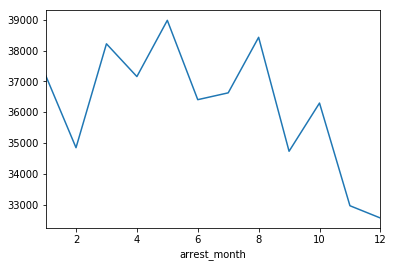

In [100]:
df.groupby('arrest_month').arrest_month.count().plot()

This is spiky because different months have different numbers of days.

In [48]:
import holidays

us_holidays = holidays.UnitedStates() 

In [49]:
df['is_holiday'] = df['Arrest Date'].apply(lambda x: x in us_holidays)

In [61]:
df.groupby(['is_holiday', 'Arrest Date'])['Name'].count().reset_index().groupby('is_holiday').Name.mean()

is_holiday
False    63.544155
True     48.896373
Name: Name, dtype: float64

A surprising result that less arrests happen on holidays than non-holidays.

In [101]:
df['arrest_day_of_month'] = df['Arrest Date'].apply(lambda x: x.day)

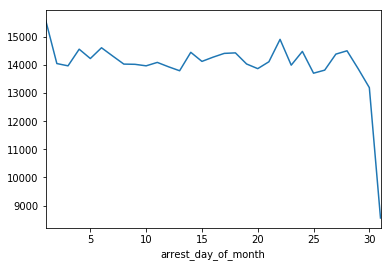

In [102]:
df.groupby('arrest_day_of_month').arrest_day_of_month.count().plot()

In [103]:
df['Booked'] = pd.to_datetime(df['Booked'])
df['booked_year'] = df.Booked.apply(lambda x: x.year)
df['booked_month'] = df.Booked.apply(lambda x: x.month)

### Arresting agencies

In [107]:
print('''Overall distribution of arresting agency activity:

{}
'''.format(df['Arresting Agency'].value_counts()))

Overall distribution of arresting agency activity:

BOULDER COUNTY SHERIFFS OFFICE    152564
BOULDER PD                        118867
LONGMONT PD                        87293
LAFAYETTE PD                       25000
JAIL MITTS ONLY                    14828
UNIVERSITY OF COLORADO             12026
COLORADO STATE PATROL               9420
LOUISVILLE PD                       7843
ERIE PD                             2091
NEDERLAND MARSHALS OFFICE           1470
PAROLE                              1279
BOULDER COUNTY DRUG TASK FORCE      1214
OTHER                                288
DISTRICT ATTORNEYS OFFICE            122
STATE DIVISION OF WILDLIFE            82
WARD MARSHALS OFFICE                  24
COMMUNITY CORRECTIONS                 12
Name: Arresting Agency, dtype: int64



In [15]:
df.to_csv('../data/all-bookings.csv', index=False)